This notebook goes along with the video 

https://www.youtube.com/watch?v=xi0vhXFPegw

from Rob Mulla.

## Step 0: Imports and Reading Data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [6]:
df = pd.read_csv('./coaster_db.csv')

## Step 1: Data Understanding

* Dataframe `shape`
* `head` and `tail`
* `dtypes`
* `describe`

In [7]:
df.shape

(1087, 56)

In [12]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [13]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

<font color='red'>Every column is a Series and every series has a type.</font>

In [14]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [16]:
df.describe()   # .describe() will show some information and statistics for numeric columns

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Step 2: Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

Want to subset this dataset just to the columns we want to keep. There are 2 ways to drop columns:
    
* Subseting a list of columns
* There is another way we can subset our dataset columns. That's by using the drop command.

In [24]:
# Example of dropping columns
# df.drop(['Opening date'], axis=1)

In [26]:
# Want to subset this dataset just to the columns we want to keep
# (subseting a list of columns) (rewrite the df to the new subset of the dataframe)
# 注意：此种方法后边一定要加 .copy() command. This makes sure that python knows it's a brand new 
# dataframe, not just a reference to the old one. When you mulnipulate the dataframe later on,
# it's gonna be nice to run this copy.

df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    # 'Opening date',
    # 'Type', 
    'Manufacturer', 
    # 'Height restriction', 'Model', 'Height',
    # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    # 'Track layout', 'Fastrack available', 'Soft opening date.1',
    # 'Closing date', 'Opened', 'Replaced by', 'Website',
    # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    # 'Single rider line available', 'Restraint Style',
    # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced', 
    'latitude', 'longitude', 
    'Type_Main',
    'opening_date_clean', 
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph', 
    # 'height_value', 'height_unit', 
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()

In [27]:
df.shape

(1087, 13)

drop 完/clean 完 column 后（对column进行完整理后），接下来我们对每个column 的 data type进行 clean up

In [29]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [31]:
# Conert 'opening_date_clean' to datetime

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [33]:
# 除去 datetime 外，还可以把 numeric column 转化成 numeric 
# (not necessarily here, but it's an option)

# pd.to_numeric(df['year_introduced'])

drop column 和 clean up data type 后，还可以 clean up 一下 column name

In [34]:
# Rename our columns
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [36]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

Next step is to try to identify where missing values exist in the dataframe and how often they occur

In [39]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

We may also want to see if they are any rows that are duplicated.

In [42]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [43]:
# Can also run duplicated on a subset of columns
df.duplicated(subset=['Coaster_Name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [44]:
# 自己试了一下：
df['Coaster_Name'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Name: Coaster_Name, Length: 1087, dtype: bool

In [45]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [47]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [50]:
# Run duplicated on a subset of columns
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

In [55]:
# 想要去掉所有 duplicated 的 column，只留下非 duplicated 的
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
    .reset_index(drop=True).copy()

In [56]:
df.shape

(990, 13)

#### Step 2 总结: Data Preparation Summary

* Drop（clean up）一下 <font color='green'>**没有用的 column**</font>
    * 两种 drop columns 的方法：
        * `drop` 函数
        * subset a list of columns (用 `.loc` 函数)：这种方法千万被忘记在最后 call `.copy()` function

* Clean up 一下 column 的 <font color='green'>**data type**</font>
    * 日期 column 应该转化成 datetime by calling the `pd.to_datetime()` function
    * numeric value 应该转化成 numeric data type，by calling the `pd.to_numeric()` function)，这个function 会:
        * 是 int 就转化成 `int64`
        * 是 float 就转化成 `float64`
    * Categorical column 应该转化成 Categorical

* Clean up 一下 <font color='green'>**column name**</font>
    * 不推荐 column name 中含有空格，最好用下划线 _
    * rename column 用 `.rename` function:
        * 这个 function 有一个 columns parameter，可以 pass in 一个 dict，key 是 old name，value 是 new name
        
* 处理 <font color='green'>**missing value**</font>：identify where missing values exist in the dataframe and how often they occur
    * 用 `df.isna().sum()` 来看每个 column 各有多少 missing value
    * <font color='red'>根据需求和business needs，需不需要 fill 一下 missing value，如果需要的话，用什么 fill 的方法？</font>

* 处理 <font color='green'>**duplicate**</font>: want to see if they are any rows that are duplicated
    * Check duplicate: `df.duplicated()`
    * Check 某些 subset 有没有 duplicate（以某些 column subset 作为 key 来check duplicate）：
        * 用 `duplicated()` 函数的 `subset`: 
        ```python
        df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date']).sum()
        ```
        * 去掉 duplicate，只保留非 duplicate 的 row：
        ```python
        df = df.loc[~df.duplicated(subset=['Coaster_Name', 
                                           'Location', 'Opening_Date'])]
                       .reset_index(drop=True)
                       .copy()
        ```
        * 去掉 duplicate 也可用 `df.drop_duplicates()` function

Now we are done with the data cleaning. We have a good subset of the data and a good understanding for where missing values occurs.

## Step 3: Feature Understanding

(Univariate analysis) (univariate: 单变量的)

* Plotting Feature Distributions

    * Histogram
    * KDE (KDE: Kernal Distribution/Density Estimation)
    * Boxplot

In [60]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1955     1
1956     1
1959     1
1961     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

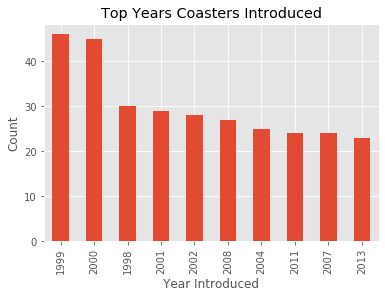

In [66]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top Years Coasters Introduced')

# Above, we save this plot as matplotlib axis and with the axis we can add some additional 
# information to it.

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

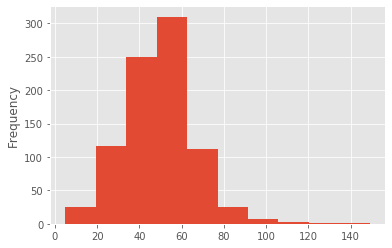

In [67]:
df['Speed_mph'].plot(kind='hist')

# A histogram shows us, in different bins, what's the count of that value.

Text(0.5, 0, 'Speed (mph)')

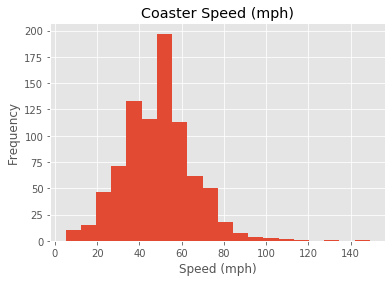

In [68]:
# Use differenct bins sizes to get a better idea of what the distribution looks like
ax = df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed (mph)')

# Save off this plot to a matplotlib axis, so that we can add some additional features to it.

ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

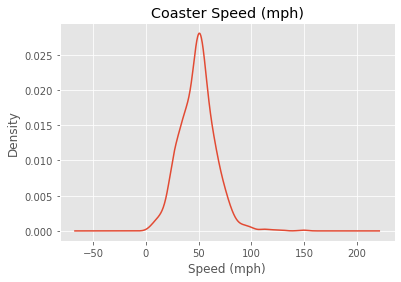

In [75]:
# KBE: kernel density plot
ax = df['Speed_mph'].plot(kind='kde', title='Coaster Speed (mph)')

# Save off this plot to a matplotlib axis, so that we can add some additional features to it.

ax.set_xlabel('Speed (mph)')

#### Step 3 总结 (Feature Understanding, Univarite analysis 单变量的分析) 

对一个变量（一个 column/列）可以进行的操作：

* <font color='green'>**bar plot**</font>：两种 bar plot
    * vertical bar plot -> `df.plot(kind='bar')`
    * horizontal bar plot -> `df.plot(kind='barh')`
    * 画 bar plot 时，dataframe 的 row 得有一个 index label (而不是 default 的数字 index：0, 1, 2, 3, ...)，通常 bar plot 是在经历过某些 aggregation function 之后画的，例如 
    ```python
    df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top Years Coasters Introduced')
    ```

* <font color='green'>**histogram**</font>: A histogram shows us, in different bins, what's the count of that value.
    * histogram 让你看看the distribution:
        * 可以通过 change bins sizes to get a better idea about what the distributuion looks like
        ```python
        df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed (mph)')
        ```
    
    
* <font color='green'>**boxplot**</font>: 去看一看有没有什么 extrem value


We have looked at each feature individually and some distributions and other characteristics of a given column in our data set, but what we really want to look at is how is the different features related to each other in our data set.

## Step 4: Feature Relationships

* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

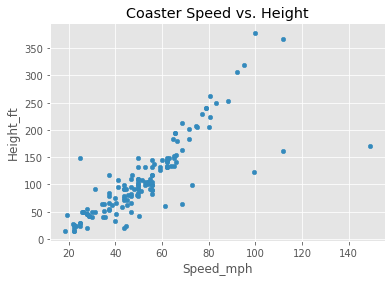

In [83]:
# Scatter plot: compare two features side by side by making a scatter plot
df.plot(kind='scatter', 
        x='Speed_mph', 
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

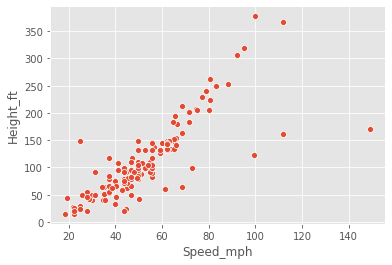

In [84]:
sns.scatterplot(x='Speed_mph', y='Height_ft', data=df)

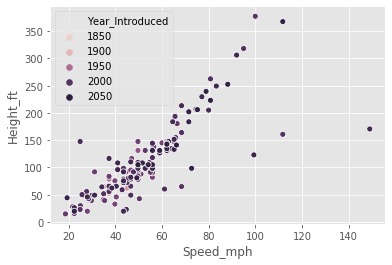

In [86]:
# There are some cool stuff we can do with seaborn we can't with matplotlib out of the box
# We can have the 'Year_Introduced' or other features be the color and the way to do that is 
# by adding this as the hue in the scatter plot. (collor the plot based on another variable)
sns.scatterplot(x='Speed_mph', y='Height_ft', hue='Year_Introduced', data=df)
plt.show()

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/shihaosun/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


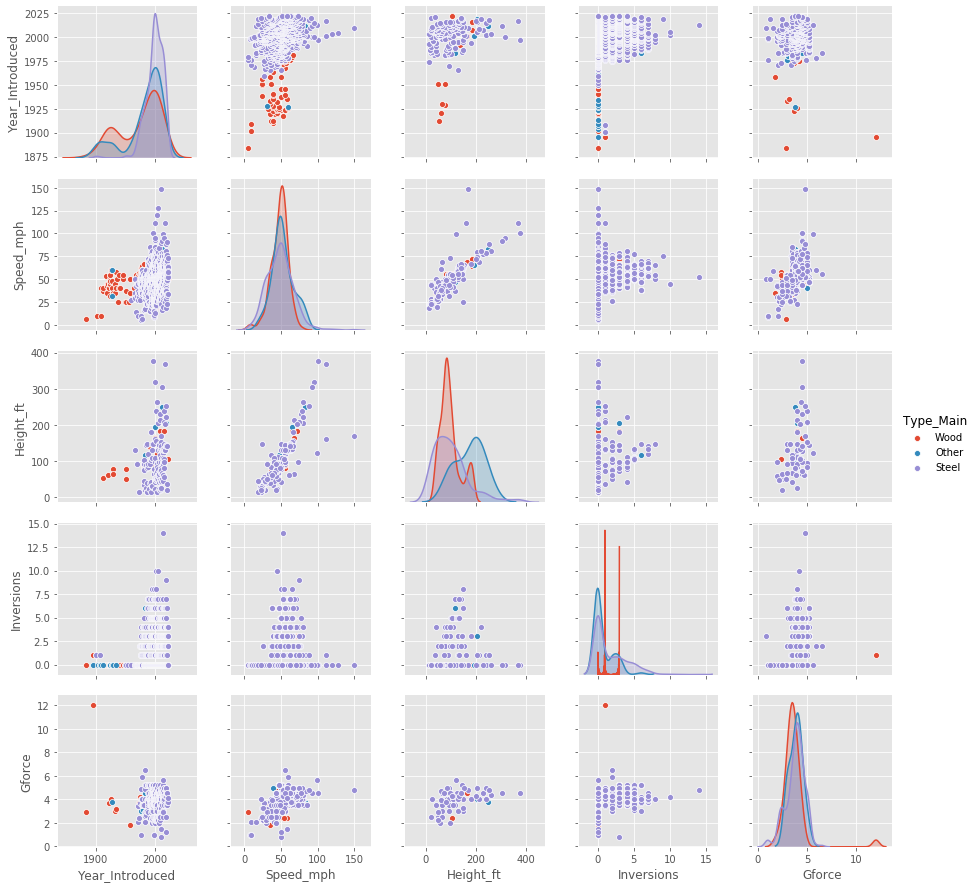

In [89]:
# So far we have looked at comparing two features within our data sets, what if we want to 
# compare more than two?
# Seaborn has a pretty nicely built-in functionality called a pair plot where we can compare 
# multiple features against each other in our data set.
sns.pairplot(df, vars=['Year_Introduced', 'Speed_mph', 
                       'Height_ft', 'Inversions', 'Gforce'],
               hue='Type_Main')
plt.show()

In [94]:
# Another thing you might want to do in comparing features against each other is to look
# at correlations.

# Run corr() on the subset of features that we know are numeric
df_corr = df[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna() \
                                                                                   .corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


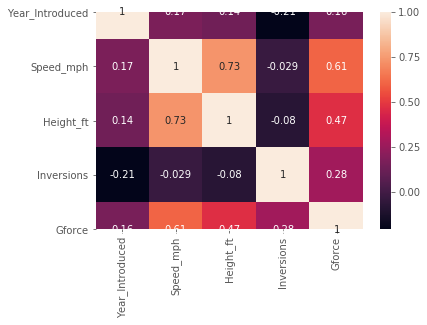

In [98]:
sns.heatmap(df_corr, annot=True)

#### Step 4 总结：feature relationship

<font color='red'>Step 4 is all about comparing features against each other.</font>

<font color='purple'>**Compare 2 features:**</font>

* Scatter plot: one thing we can do to compare different features in our data set is to just 
    compare two features side by side by making a scatter plot.
    
<font color='purple'>**Compare multiple features:**</font>

* pairplot: seaborn 给了我们这个 powerful tool


* heatmap

In [99]:
df['Location'].value_counts()

Other                                181
Kings Island                          19
Cedar Point                           18
Six Flags Magic Mountain              17
Hersheypark                           16
                                    ... 
Parque Espana-Shima Spain Village      1
Dreamland Margate                      1
Loudoun Castle                         1
Luna Park Melbourne                    1
Battersea Park                         1
Name: Location, Length: 280, dtype: int64

## Step 5: Ask a Question about the Data

* Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters (minimum of 10)?

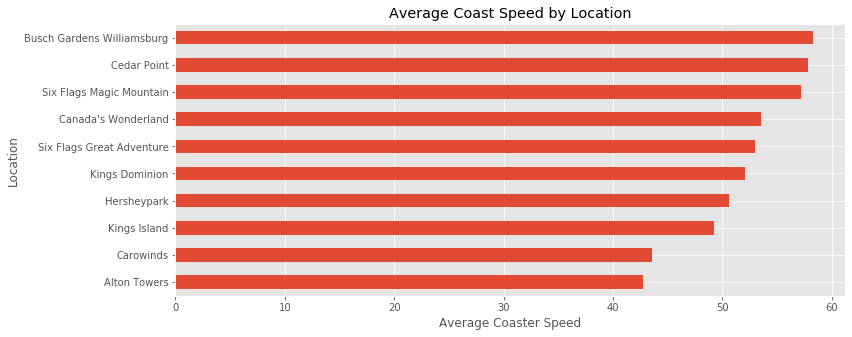

In [113]:
ax = df.query('Location != "Other"').groupby('Location')['Speed_mph'] \
  .agg(['mean', 'count']) \
  .query('count >= 10')  \
  .sort_values('mean')['mean'] \
  .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')

ax.set_xlabel('Average Coaster Speed')
plt.show()

In [106]:
df.loc[723, 'Speed_mph'] = 100

In [101]:
df.query('Location != "Other"').groupby('Location').count()

,Coaster_Name,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
Location,,,,,,,,,,,,
"2904 Fantasy Way Myrtle Beach, South Carolina, U.S.",2,2,0,2,2,2,2,0,0,0,2,0
"63rd and N.W. Expressway, Oklahoma City, Oklahoma, U.S.",1,1,0,1,0,0,1,0,0,0,1,0
"8039 Beach BoulevardBuena Park, California 90620, U.S.",1,0,0,1,1,1,1,0,0,0,1,0
Adlabs Imagica,1,1,1,1,1,1,1,1,1,0,1,0
Adventure City,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Xishuangbanna Theme Park,1,1,1,1,1,1,1,1,1,0,1,0
Yomiuriland,4,4,4,4,4,4,4,4,4,1,4,2
ZDT's Amusement Park,1,1,1,1,0,0,1,1,1,0,1,0
